In [1]:
import pandas as pd
df = pd.read_excel('all_ex_holidays.xlsx')
print(df.shape)
print(df.head)

(1048575, 12)
<bound method NDFrame.head of               id       date  store_nbr                      family    sales  \
0              0 2013-01-01          1                  AUTOMOTIVE    0.000   
1              1 2013-01-01          1                   BABY CARE    0.000   
2              2 2013-01-01          1                      BEAUTY    0.000   
3              3 2013-01-01          1                   BEVERAGES    0.000   
4              4 2013-01-01          1                       BOOKS    0.000   
...          ...        ...        ...                         ...      ...   
1048570  1048570 2014-08-13          3                     POULTRY  974.098   
1048571  1048571 2014-08-13          3              PREPARED FOODS  324.293   
1048572  1048572 2014-08-13          3                     PRODUCE   10.000   
1048573  1048573 2014-08-13          3  SCHOOL AND OFFICE SUPPLIES    0.000   
1048574  1048574 2014-08-13          3                     SEAFOOD   69.116   

       

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
def data_pipeline(df):
    # Fill missing oil prices
    df['dcoilwtico'] = df['dcoilwtico'].fillna(method='ffill').fillna(method='bfill')


    df = pd.get_dummies(df, columns=['family', 'type', 'cluster'], drop_first=True)
    # Convert date column to datetime
    df['date'] = pd.to_datetime(df['date'])

    # Extract year, month, and day of the week
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day_of_week'] = df['date'].dt.dayofweek
    # Used chatGPT for help in some sections

    # Select numerical columns to scale
    numerical_features = ['transactions', 'onpromotion', 'dcoilwtico', 'year', 'month', 'day_of_week']
    scaler = StandardScaler()
    df[numerical_features] = scaler.fit_transform(df[numerical_features])

    X = df.drop(['id', 'sales'], axis=1)
    y = df['sales']
    y = df['sales']

    # 80/20 split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
    X_train = X_train.drop(['date'], axis=1, errors='ignore')
    X_test = X_test.drop(['date'], axis=1, errors='ignore')
    # One-hot encoding to categorical columns
    X_train = pd.get_dummies(X_train, columns=['city', 'state'], drop_first=True)
    X_test = pd.get_dummies(X_test, columns=['city', 'state'], drop_first=True)

    X_train, X_test = X_train.align(X_test, join='left', axis=1)
    X_test = X_test.fillna(0)
    return X_train, X_test, y_train, y_test

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_model_performance(y_test, y_pred, model_name):
    # Scatter Plot of Predicted vs Actual
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.6, label='Predicted vs Actual')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit (y=x)')
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'{model_name}: Predicted vs Actual Sales')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Residual Plot
    residuals = y_test - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--', label='Zero Error Line')
    plt.xlabel('Predicted Sales')
    plt.ylabel('Residuals (Actual - Predicted)')
    plt.title(f'{model_name}: Residual Plot')
    plt.legend()
    plt.grid(True)
    plt.show()



In [4]:
X_train, X_test, y_train, y_test = data_pipeline(df)

C:\Users\Shruti Bala\AppData\Local\Temp\ipykernel_13724\2115539270.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['dcoilwtico'] = df['dcoilwtico'].fillna(method='ffill').fillna(method='bfill')


In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2}")
print(f"RMSE: {rmse}")

R² Score: 0.5644981774555128
RMSE: 569.908551650841


C:\Users\Shruti Bala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


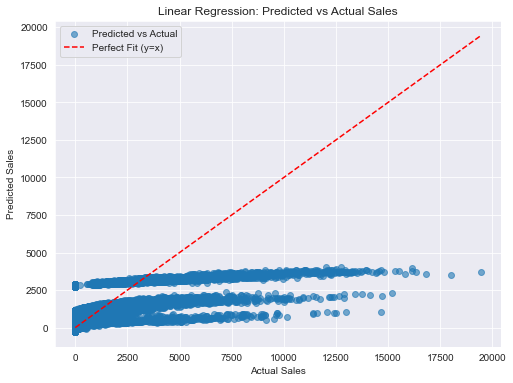

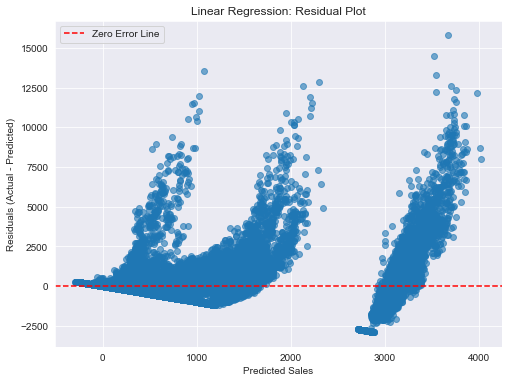

In [6]:
# Plot for Linear Regression
plot_model_performance(y_test, model.predict(X_test), model_name="Linear Regression")

In [7]:
from sklearn.neighbors import KNeighborsRegressor

df_sample = df.sample(frac=0.5, random_state=42)  # Use 50% of the data because when we use the full dataset KNN takes too long to run
X_train, X_test, y_train, y_test = data_pipeline(df_sample)

n_neighbors = 5
knn_model = KNeighborsRegressor(n_neighbors=n_neighbors)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"KNN R² Score: {r2}")
print(f"KNN RMSE: {rmse}")

C:\Users\Shruti Bala\AppData\Local\Temp\ipykernel_13724\2115539270.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['dcoilwtico'] = df['dcoilwtico'].fillna(method='ffill').fillna(method='bfill')


KNN R² Score: 0.890513846475384
KNN RMSE: 267.60051623644614


C:\Users\Shruti Bala\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


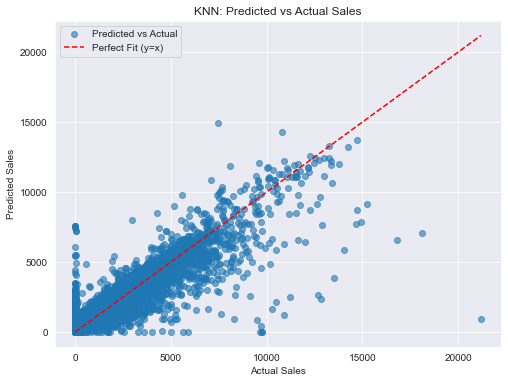

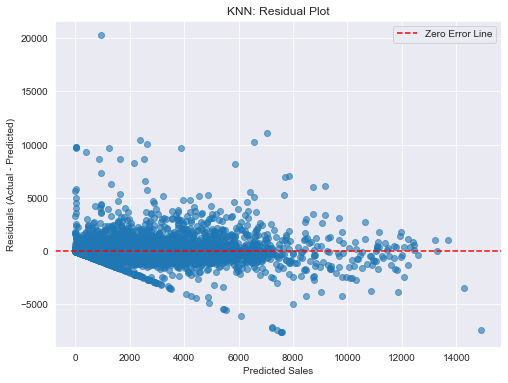

In [8]:
# Plot for KNN
plot_model_performance(y_test, knn_model.predict(X_test), model_name="KNN")